In [93]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [94]:
# Lod dataset 
df = pd.read_csv(r"E:\MLproject\calihousepred\notebook\data\California Housing Prediction.csv")

df.head()

,Longitude,Latitude,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Median Income,Ocean Proximity,Median House Value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [95]:
# Data Summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Longitude           20640 non-null  float64
 1   Latitude            20640 non-null  float64
 2   Housing Median Age  20640 non-null  int64  
 3   Total Rooms         20640 non-null  int64  
 4   Total Bedrooms      20433 non-null  float64
 5   Population          20640 non-null  int64  
 6   Households          20640 non-null  int64  
 7   Median Income       20640 non-null  float64
 8   Ocean Proximity     20640 non-null  object 
 9   Median House Value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [96]:
df.isnull().sum()

Longitude               0
Latitude                0
Housing Median Age      0
Total Rooms             0
Total Bedrooms        207
Population              0
Households              0
Median Income           0
Ocean Proximity         0
Median House Value      0
dtype: int64

In [97]:
from sklearn.impute import SimpleImputer

columns = ['Total Bedrooms']

# Create a SimpleImputer object with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the specified columns
imputer.fit(df[columns])

# Transform and replace missing values in the DataFrame
df[columns] = imputer.transform(df[columns])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Longitude           20640 non-null  float64
 1   Latitude            20640 non-null  float64
 2   Housing Median Age  20640 non-null  int64  
 3   Total Rooms         20640 non-null  int64  
 4   Total Bedrooms      20640 non-null  float64
 5   Population          20640 non-null  int64  
 6   Households          20640 non-null  int64  
 7   Median Income       20640 non-null  float64
 8   Ocean Proximity     20640 non-null  object 
 9   Median House Value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [98]:
df.isnull().sum()

Longitude             0
Latitude              0
Housing Median Age    0
Total Rooms           0
Total Bedrooms        0
Population            0
Households            0
Median Income         0
Ocean Proximity       0
Median House Value    0
dtype: int64

In [99]:
df['Ocean Proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [100]:
# Remove outliers 
def remove_outliers_iqr(data):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outlier removal
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    outliers_removed = data[(data >= lower_bound) & (data <= upper_bound)]
    
    return outliers_removed

# Remove outliers from 'Median_House_Value' column
df['Median House Value'] = remove_outliers_iqr(df['Median House Value'])


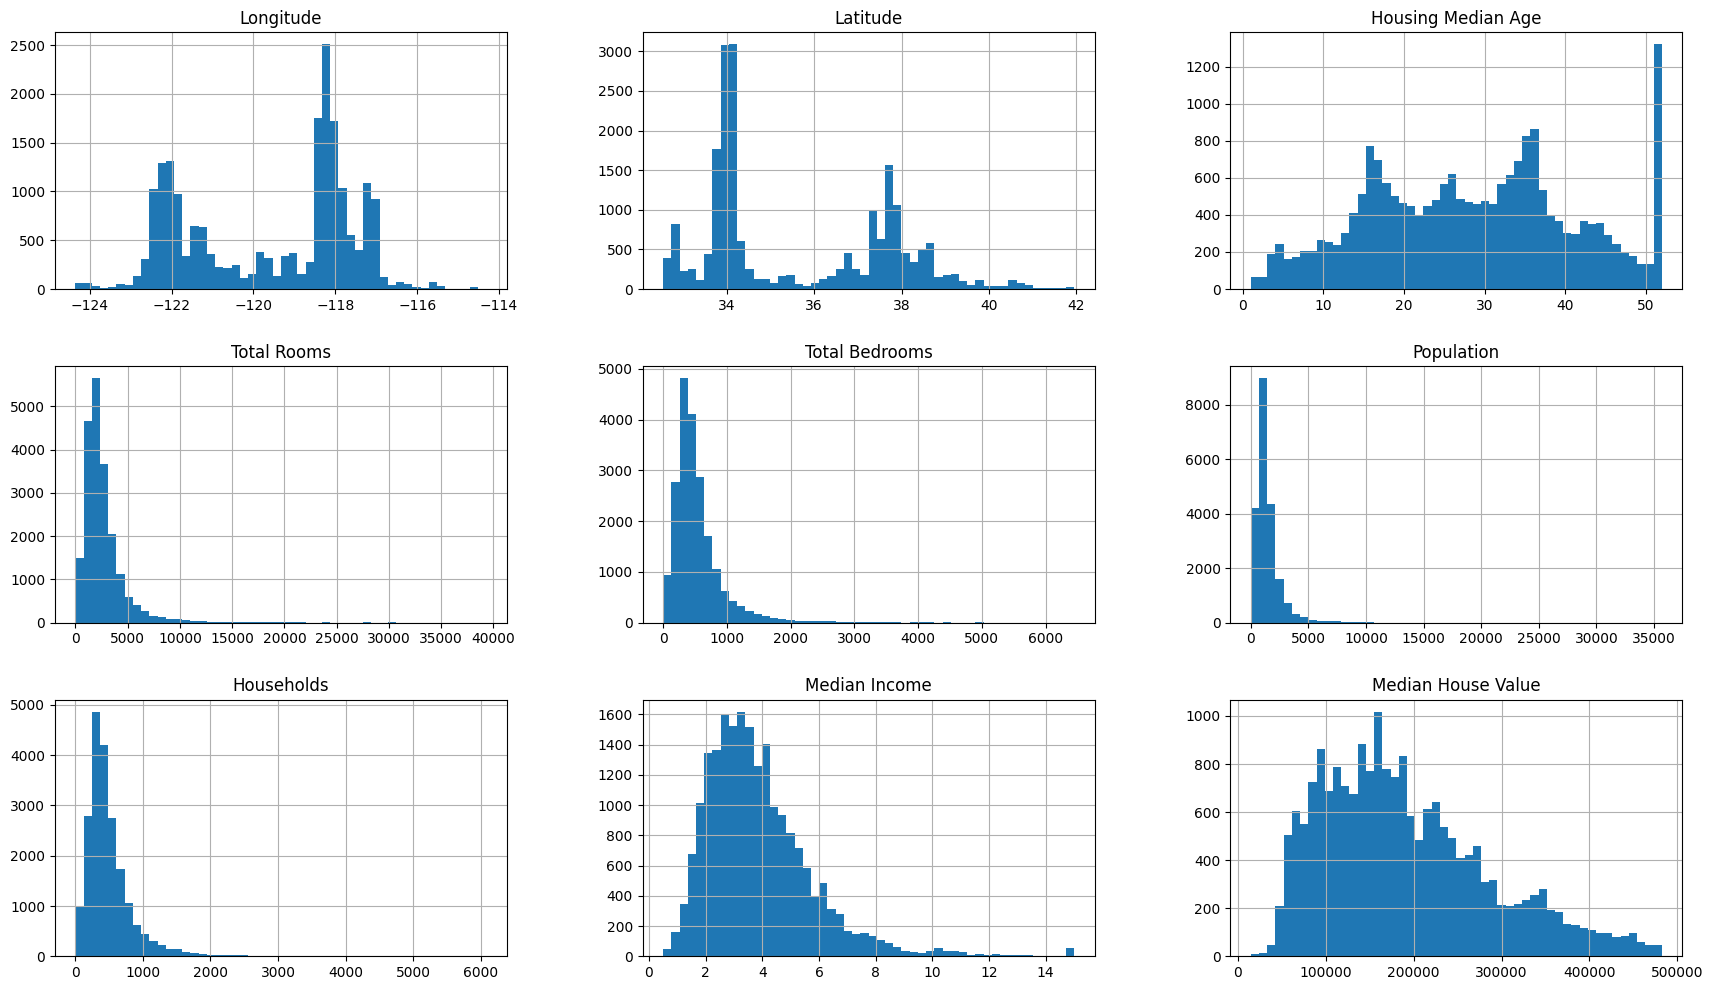

In [101]:
# Data distribution for numeric columns 
df.hist(bins=50, figsize=(21, 12))

plt.show()

In [102]:
df.head()

,Longitude,Latitude,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Median Income,Ocean Proximity,Median House Value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200.0


In [103]:
data = df.copy()

In [104]:

print(data.columns)

Index(['Longitude', 'Latitude', 'Housing Median Age', 'Total Rooms',
       'Total Bedrooms', 'Population', 'Households', 'Median Income',
       'Ocean Proximity', 'Median House Value'],
      dtype='object')


In [105]:
# Select columns with dtype object
cat_columns = df.select_dtypes(include=['object'])

num_columns = df.select_dtypes(include=['int64', 'float64'])

print("Categorical Columns")
print(cat_columns.columns)
print()
print("Numerical Columns")
print(num_columns.columns)

Categorical Columns
Index(['Ocean Proximity'], dtype='object')

Numerical Columns
Index(['Longitude', 'Latitude', 'Housing Median Age', 'Total Rooms',
       'Total Bedrooms', 'Population', 'Households', 'Median Income',
       'Median House Value'],
      dtype='object')


In [119]:
from sklearn.preprocessing import OneHotEncoder

# Create a list of columns to encode
categorical_columns = ['Ocean Proximity']

# Create a copy of the DataFrame with the selected columns
encoded_df = df.copy()

# Create an instance of OneHotEncoder
# sparse=False to produce a dense array and drop='first' to drop the first category of each variable
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Iterate through each categorical column

for column in categorical_columns:
    # Fit and transform the selected column
    one_hot_encoded = encoder.fit_transform(encoded_df[[column]])

    # Create a DataFrame with one-hot encoded columns
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out([column]))

    # Concatenate the one-hot encoded DataFrame with the original DataFrame
    encoded_df = pd.concat([encoded_df, one_hot_df], axis=1)

    # Drop the original categorical column
    encoded_df = encoded_df.drop([column], axis=1)

# Display the resulting DataFrame
df = encoded_df.copy()

df.head()

,Longitude,Latitude,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Median Income,Median House Value,Ocean Proximity_INLAND,Ocean Proximity_ISLAND,Ocean Proximity_NEAR BAY,Ocean Proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200.0,0.0,0.0,1.0,0.0


In [107]:
# # Remove 'Median House Value' column and store its values
# median_house_value_col = df.pop('Median House Value')

# # Add 'Median House Value' column back to the DataFrame as the last column
# df = df.assign(**{'Median House Value': median_house_value_col})

# # Check the new order of columns
# print(df.columns)

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

# Evaluation 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [109]:
# Define the features and target variable 

# drop null values
df = df.dropna()

# Features 
X = df.drop(columns={'Median House Value'})

# Target variable 
y = df['Median House Value']

In [110]:
# Training set and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [111]:
# Initialize the standard scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

### XGBRegressor

In [112]:

def model(X_train_scaled, y_train, X_test_scaled, y_test):
    # Initialize the XGBRegressor model
    xgb_model = XGBRegressor()

    # Fit the model on the entire training data
    xgb_model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = xgb_model.predict(X_test_scaled)

    # Evaluate the model on the testing data
    mae_test = mean_absolute_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mse_test = mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)

    # Return the evaluation metrics
    return mae_test, r2_test, mape_test, mse_test, rmse_test

# Example usage:
# Assuming you have defined X_train_scaled, y_train, X_test_scaled, and y_test
mae_test, r2_test, mape_test, mse_test, rmse_test = model(X_train_scaled, y_train, X_test_scaled, y_test)

print("MAE:", mae_test)
print("R2:", r2_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)

### Random Forest

In [113]:


def model(X_train_scaled, y_train, X_test_scaled, y_test):
    # Initialize the XGBRegressor model
    rf_model = RandomForestRegressor()

    # Fit the model on the entire training data
    rf_model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = rf_model.predict(X_test_scaled)

    # Evaluate the model on the testing data
    mae_test = mean_absolute_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mse_test = mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)

    # Return the evaluation metrics
    return mae_test, r2_test, mape_test, mse_test, rmse_test

# Example usage:
# Assuming you have defined X_train_scaled, y_train, X_test_scaled, and y_test
mae_test, r2_test, mape_test, mse_test, rmse_test = model(X_train_scaled, y_train, X_test_scaled, y_test)

print("MAE:", mae_test)
print("R2:", r2_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)

### XGBRegressor using stratified KFold

In [114]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

# Define the XGBoost model
xgb_model = XGBRegressor()

# Define the number of folds for cross-validation
n_folds = 10

# Create a KFold object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store the evaluation metrics
mae_scores = []
r2_scores = []
mape_scores = []
mse_scores = []
rmse_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X, y):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize the standard scaler
    scaler = StandardScaler()

    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform the testing data
    X_test_scaled = scaler.transform(X_test)

    # Fit the model on the training data
    xgb_model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = xgb_model.predict(X_test_scaled)

    # Evaluate the model on the testing data
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store the evaluation metrics
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

# Calculate the average evaluation metrics
mae_avg = np.mean(mae_scores)
r2_avg = np.mean(r2_scores)
mape_avg = np.mean(mape_scores)
mse_avg = np.mean(mse_scores)
rmse_avg = np.mean(rmse_scores)

# Print the average evaluation metrics
print("MAE:", mae_avg)
print("R2:", r2_avg)
print("MAPE:", mape_avg)
print("MSE:", mse_avg)
print("RMSE:", rmse_avg)

## Hyperparameter tuning with optuna

In [115]:
import optuna

def objective(trial):
    # Define hyperparameters to search
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10.0, log=True),
        'random_state': 42  # Fixed random state for reproducibility
    }
    
    # Initialize the XGBRegressor model
    xgb_model = XGBRegressor(**params)

    # Fit the model on the entire training data
    xgb_model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = xgb_model.predict(X_test_scaled)

    # Evaluate the model on the testing data (MAE)
    mae_test = mean_absolute_error(y_test, y_pred)

    return mae_test


In [116]:
study = optuna.create_study(direction='minimize')  # Minimize MAE
study.optimize(objective, n_trials=100, show_progress_bar=True, n_jobs= -1)  # Adjust n_trials as needed

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [117]:
best_params = trial.params

# Initialize the XGBRegressor model with best hyperparameters
best_xgb_model = XGBRegressor(**best_params, random_state=42)

# Fit the model on the entire training data
best_xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = best_xgb_model.predict(X_test_scaled)

# Evaluate the model on the testing data
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)

# Print evaluation metrics
print("MAE:", mae_test)
print("R2:", r2_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)